#  <span style="color:#623C2B; font-family:roboto;"><b>COFFEE TASTE TEST</b></span>
<span style="color:#736849"><i>**2024 Tidytuesday  Week 20**<i></span>

The Great American Coffee Taste Test
"#623C2B", "#AF524E", "#736849", "#EBD188"

## Setup

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

### Data

In [2]:
tt_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/"
dat_url = "data/2024/2024-05-14/coffee_survey.csv"
dfr = pd.read_csv(tt_url + dat_url)

In [3]:
dfr.head(3)

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

### Overview

In [10]:
dfr.shape

(4042, 57)

In [9]:
dfr.columns

Index(['submission_id', 'age', 'cups', 'where_drink', 'brew', 'brew_other',
       'purchase', 'purchase_other', 'favorite', 'favorite_specify',
       'additions', 'additions_other', 'dairy', 'sweetener', 'style',
       'strength', 'roast_level', 'caffeine', 'expertise',
       'coffee_a_bitterness', 'coffee_a_acidity',
       'coffee_a_personal_preference', 'coffee_a_notes', 'coffee_b_bitterness',
       'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
       'coffee_c_bitterness', 'coffee_c_acidity',
       'coffee_c_personal_preference', 'coffee_c_notes', 'coffee_d_bitterness',
       'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
       'prefer_abc', 'prefer_ad', 'prefer_overall', 'wfh', 'total_spend',
       'why_drink', 'why_drink_other', 'taste', 'know_source', 'most_paid',
       'most_willing', 'value_cafe', 'spent_equipment', 'value_equipment',
       'gender', 'gender_specify', 'education_level', 'ethnicity_race',
       'ethnici

In [11]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

### Frequency by age group

In [4]:
age_df = dfr['age'].value_counts().reset_index()
age_df.age = age_df.age.str.replace(' years old', '')
age_df

,age,count
0,25-34,1986
1,35-44,960
2,18-24,461
3,45-54,302
4,55-64,187
5,>65,95
6,<18,20


In [5]:
np.array(age_df.age)

array(['25-34', '35-44', '18-24', '45-54', '55-64', '>65', '<18'],
      dtype=object)

In [6]:
age_df['age2'] = pd.Categorical(
    age_df.age, 
    categories=['<18', '25-34', '35-44', '18-24', '45-54', '55-64', '>65'],
    ordered=True)
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     7 non-null      object  
 1   count   7 non-null      int64   
 2   age2    7 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 607.0+ bytes


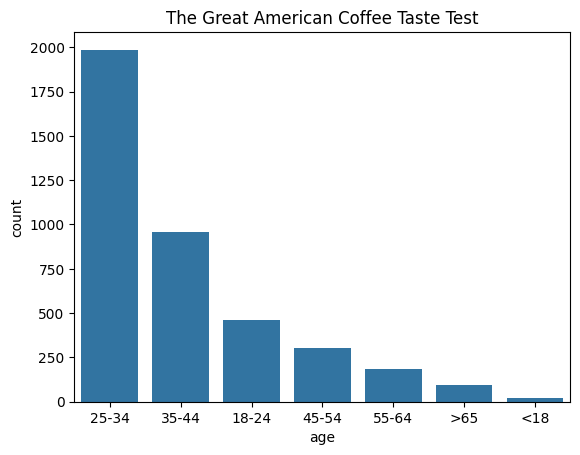

In [7]:
ax = sns.barplot(x = 'age', y = 'count', data = age_df)
ax.set_title('The Great American Coffee Taste Test')
plt.show()

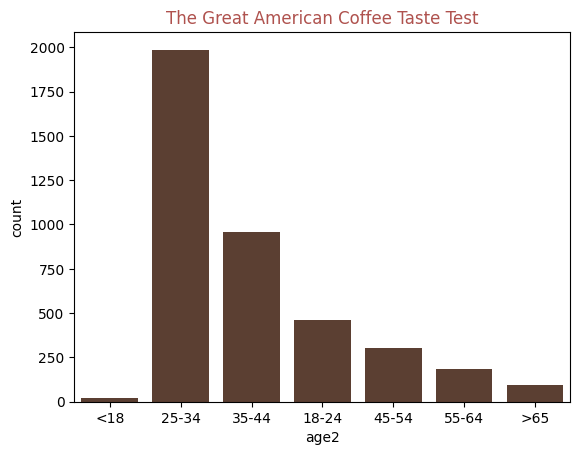

In [8]:
ax = sns.barplot(x = 'age2', y = 'count', color = '#623C2B', data = age_df)
ax.set_title('The Great American Coffee Taste Test', color = '#AF524E')
plt.show()

### Favorite coffee drink

In [10]:
fav_df = dfr['favorite'].value_counts().reset_index()

fav_df = fav_df[fav_df.favorite != 'Other']

fav_df['favorite'] = np.where(
    fav_df['favorite'] == 'Regular drip coffee', 
    'Drip coffee',
    np.where(
        fav_df['favorite'] == 'Blended drink (e.g. Frappuccino)',
        'Blended drink',
        fav_df['favorite']))

fav_df


,favorite,count
0,Pourover,1084
1,Latte,680
2,Drip coffee,442
3,Cappuccino,341
4,Espresso,330
5,Cortado,312
6,Americano,249
7,Iced coffee,156
8,Mocha,118
10,Cold brew,109


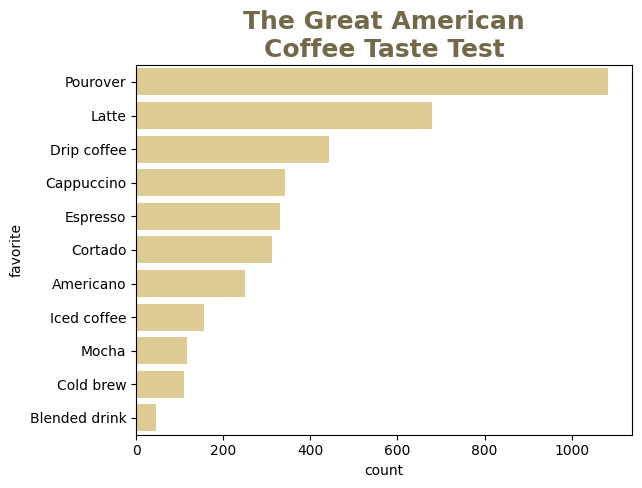

In [20]:
ax = sns.barplot(x = 'count', y = 'favorite', color = "#EBD188", data = fav_df)
ax.set_title(
    'The Great American\nCoffee Taste Test', 
    color = '#736849',
    weight = 'bold',
    size = 18)
plt.show()

In [ ]:
"#736849", "#EBD188"